In the light of the recent startling events of the wildfires in the Amazon, I decided to run a short descriptive analysis for Brazil fires in the last ~ 20 years. Media gave me some curiosities and questions that I wanted to check with real data and unbiased mindset.

The dataset I worked on has data starting 1998 to 2017, on months, for every state in Brazil

First, importing and preparing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('../input/forest-fires-in-brazil/amazon.csv', encoding='latin1')
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


There are 6454 variables, with the first registration being in 1998, and the last in 2017.

In [2]:
data['number'].describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

In [3]:
data['month'].replace(to_replace = 'Janeiro', value = 'Jan', inplace = True)
data['month'].replace(to_replace = 'Fevereiro', value = 'Feb', inplace = True)
data['month'].replace(to_replace = 'Março', value = 'Mar', inplace = True)
data['month'].replace(to_replace = 'Abril', value = 'Apr', inplace = True)
data['month'].replace(to_replace = 'Maio', value = 'May', inplace = True)
data['month'].replace(to_replace = 'Junho', value = 'Jun', inplace = True)
data['month'].replace(to_replace = 'Julho', value = 'Jul', inplace = True)
data['month'].replace(to_replace = 'Agosto', value = 'Aug', inplace = True)
data['month'].replace(to_replace = 'Setembro', value = 'Sep', inplace = True)
data['month'].replace(to_replace = 'Outubro', value = 'Oct', inplace = True)
data['month'].replace(to_replace = 'Novembro', value = 'Nov', inplace = True)
data['month'].replace(to_replace = 'Dezembro', value = 'Dec', inplace = True)

In [4]:
year_mo_state = data.groupby(by = ['year','state', 'month']).sum().reset_index()

Now, let's start building some visuals :)

Fires increased dramatically in the last 20 years, from 20,000 in 1998 to almost double in 2017. What's also alarming is that there is also an increasing trend in the data, so we can expect even more wildfires in the years to follow.

2003 and 2016 had the most wildfires throughout Brazil.

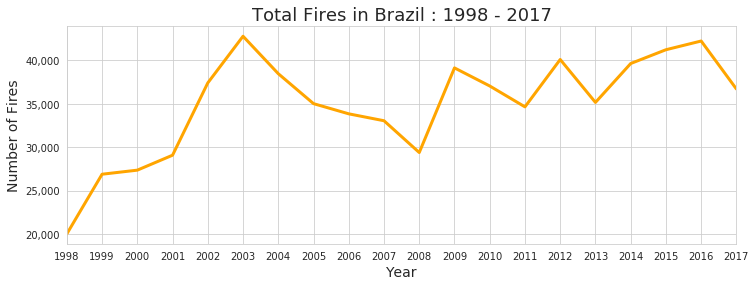

In [5]:
sns.set_style('whitegrid')
from matplotlib.pyplot import MaxNLocator, FuncFormatter

plt.figure(figsize=(12,4))

ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state, estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None)

plt.title('Total Fires in Brazil : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

View by months doesn't bring anything unexpected. There are many more fires occuring in the second half of the year than the first one, especially in the late summer to beginning of autumn.

Text(0, 0.5, 'Number of Fires')

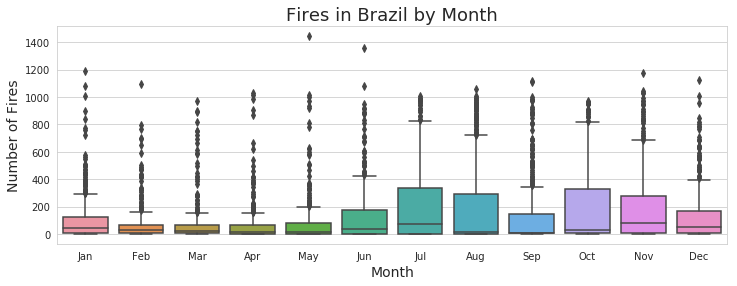

In [6]:
plt.figure(figsize=(12,4))

sns.boxplot(x = 'month', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'], 
            y = 'number', data = year_mo_state)

plt.title('Fires in Brazil by Month', fontsize = 18)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

After this, I wanted to check especially the Amazon State, as it is the most discussed in the media.

I can say I was surprised of the results: Distribution throughout the years for Amazon looks more like a random walk, with many high and low peaks, but with no increasing trend whatsoever.

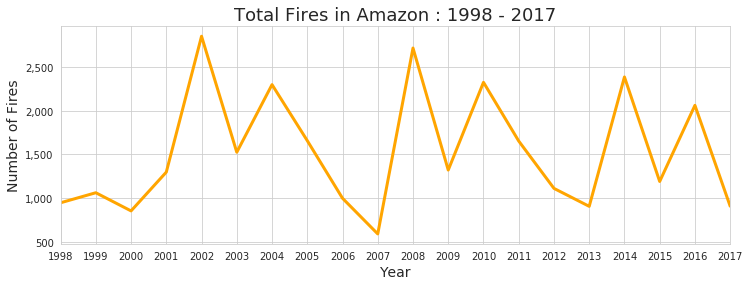

In [7]:
year_mo_state_Amazon = data[data['state'] == 'Amazonas'].groupby(by = ['year','state', 'month']).sum().reset_index()

plt.figure(figsize=(12,4))

ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_Amazon, estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None)

plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

But, if we look more closely to the dataset, Amazon isn't by far the place where most of the fires in Brazil occure. Top 3 states are Mato Grosso (an outlier, with a total sum of wildfires in the analysed period of 96k), followed by Paraiba (52k) and Sao Paulo (51k). Amazon has the 10th place in this ranking

In [8]:
data.groupby(by = 'state')['number'].sum().sort_values(ascending = False).head(10)

state
Mato Grosso     96246.028
Paraiba         52435.918
Sao Paulo       51121.198
Rio             45160.865
Bahia           44746.226
Piau            37803.747
Goias           37695.520
Minas Gerais    37475.258
Tocantins       33707.885
Amazonas        30650.129
Name: number, dtype: float64

I will also drop a map of Brazil here, just for you to refference if you are not familiar with their geography.

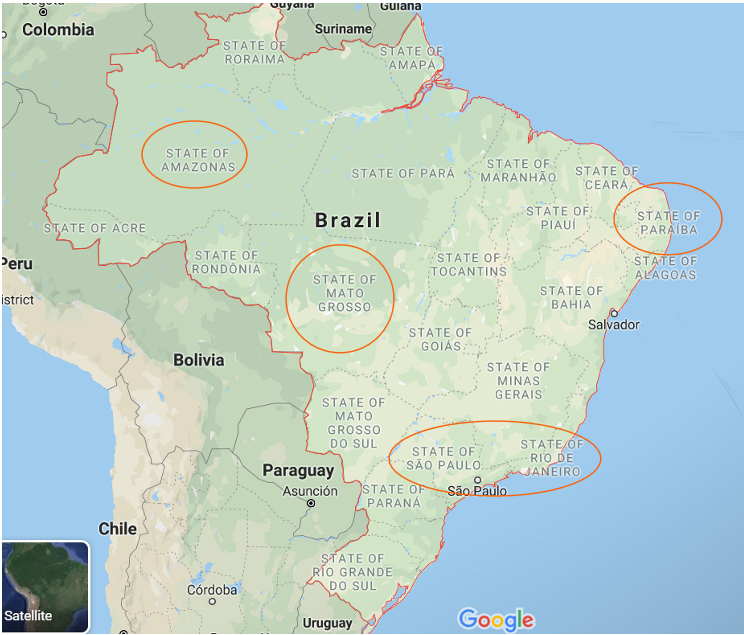

In the graph below it can be seen how far Mato Grosso is from the other states in terms of wildfires. It looks like it is also the only one increasing, while the others have an ~ "white noise" distribution, like we saw for Amazon.

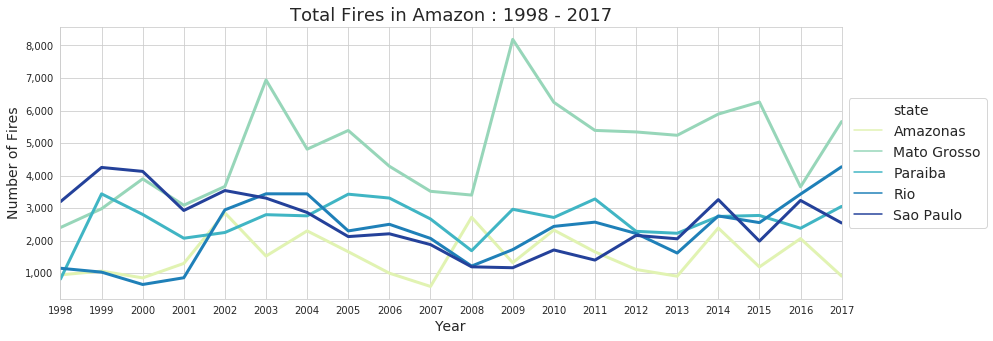

In [9]:
year_mo_state_top_states = data[data['state'].isin(['Amazonas','Mato Grosso','Paraiba','Sao Paulo','Rio'])].groupby(by = ['year','state', 'month']).sum().reset_index()

plt.figure(figsize=(14,5))

ax = sns.lineplot(x = 'year', y = 'number', data = year_mo_state_top_states, hue = 'state', estimator = 'sum', color = 'orange', lw = 3, 
                  err_style = None, palette = 'YlGnBu')

plt.title('Total Fires in Amazon : 1998 - 2017', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Number of Fires', fontsize = 14)

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})

Mato Grosso is Brazil’s third largest state. This state has a small weight of people from total population of Brazil, about 1.5%, but a very strong agricultural industry.

In the past, the state of Mato Grosso has been one of Brazil’s largest emitters of CO², due to forest fires and deforestation, driven by its strong agriculture based economy.

However, they reduced the massive deforestation starting 2004. 
For more info on the matter, here's a link you may find interesting: http://financingsustainablelandscapes.org/pilot-projects/agriculture-tackle-deforestation-mato-grosso-brazil

As an end note, it's always good to be more mindful of the environment. It doesn't require big efforts, just a pinch of added attention when you buy something (look on the label and ask yourself: is it recyclable? is it made sustainably? is it harming the environment?). You can also start turning off the the water more, or keep the lights on only in the room you stay in. Be more minimalist (do you really need that? :) ).

Hey, it's duable! :) Be better!

Cheers